## Observations and Insights 

%matplotlib notebook

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random 
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results)
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [51]:
# Checking the number of mice in the DataFrame.
#mice_count = len(merge_df["Mouse ID"].value_counts())
#mice_count
#the above is the as the nunique function 
len(merge_df)

1893

In [52]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data = merge_df.copy()
#mouse_data2 = mouse_data[mouse_data.duplicated(["Mouse ID", "Timepoint"])]
#mouse_data2

In [53]:
# Optional: Get all the data for the duplicate mouse ID. 


In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicates = mouse_data.drop_duplicates(["Mouse ID", "Timepoint"])
drop_duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [55]:
# Checking the number of mice in the clean DataFrame.
len(drop_duplicates)

1888

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol = drop_duplicates[['Tumor Volume (mm3)', 'Drug Regimen']]


get_mean = tumor_vol.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
get_median = tumor_vol.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
get_variance= tumor_vol.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
get_std = tumor_vol.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
get_sem = tumor_vol.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#making a new dataframe
summary_1 = pd.DataFrame({"Tumor Volume Mean": get_mean,
                              "Tumor Volume Median": get_median,
                              "Tumor Volume Variance": get_variance,
                              "Tumor Volume STD": get_std,
                              "Tumor Volume SEM": get_sem})
summary_1

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

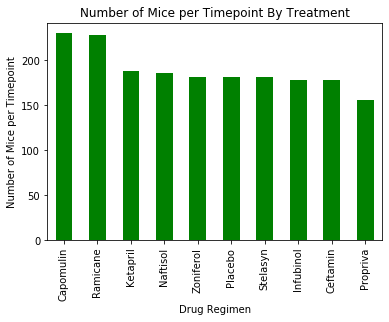

<Figure size 432x288 with 0 Axes>

In [57]:
# Generate a bar plot 
#showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#Bry helped me with this. At first I was going based off of the ave_state_rain activity, but they showed me an easier way.
bar_graph = drop_duplicates["Drug Regimen"].value_counts().plot(kind="bar", color= "g")
plt.title("Number of Mice per Timepoint By Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice per Timepoint")
plt.show()
plt.tight_layout()


Text(0, 0.5, 'Number of Mice per Timepoint')

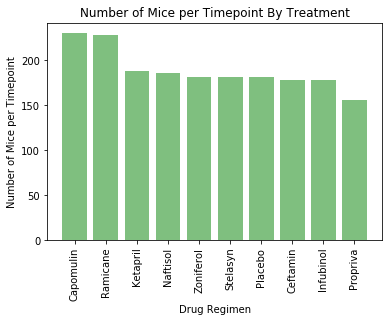

In [58]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
treatments_list = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Ceftamin", "Infubinol", "Propriva"]

y_aaxis = drop_duplicates["Drug Regimen"].value_counts()
x_axis = np.arange(len(y_aaxis))


plt.bar(x_axis, y_aaxis , color='g', alpha=0.5, align="center")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, treatments_list, rotation= 'vertical')
plt.title("Number of Mice per Timepoint By Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice per Timepoint")




## Pie Plots

In [59]:
# get total number for each gender

gender = drop_duplicates.Sex.value_counts()
gender


Male      958
Female    930
Name: Sex, dtype: int64

In [60]:
#get the percentage for the gender
gender_percentage = (drop_duplicates.Sex.value_counts(normalize = True))
gender_percentage

Male      0.507415
Female    0.492585
Name: Sex, dtype: float64

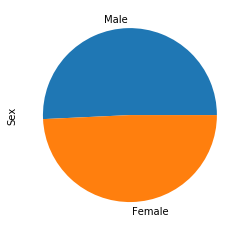

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_graph = gender_percentage.plot(kind="pie")




([<matplotlib.patches.Wedge at 0x16b6977b0f0>,
 [Text(-0.025622071352920692, -1.0997015547227285, 'Female'),
  Text(0.025622071352920828, 1.0997015547227285, 'Male')],
 [Text(-0.013975675283411286, -0.5998372116669427, '49.3%'),
  Text(0.013975675283411359, 0.5998372116669427, '50.7%')])

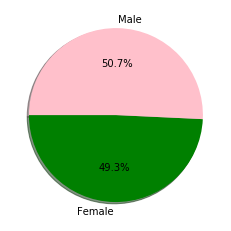

In [62]:
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [49.2585, 50.7415]

# The colors of each section of the pie chart
colors = ["green", "pink"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)


## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [64]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin

capo_df = drop_duplicates.loc[drop_duplicates["Drug Regimen"] == "Capomulin",:]

capo_quartiles = capo_df.quantile([.25,.5,.75])
capo_lowerq = capo_quartiles.loc[0.25, "Tumor Volume (mm3)"]
capo_upperq = capo_quartiles.loc[0.75, "Tumor Volume (mm3)"]
capo_median = capo_quartiles.loc[0.5, "Tumor Volume (mm3)"]
capo_iqr = capo_upperq - capo_lowerq

print(f"The lower quartile of occupancy is: {capo_lowerq}")
print(f"The upper quartile of occupancy is: {capo_upperq}")
print(f"The interquartile range of occupancy is: {capo_iqr}")
print(f"The the median of occupancy is: {capo_median} ")

capo_lower_bound = capo_lowerq - (1.5 * capo_iqr)
capo_upper_bound = capo_upperq + (1.5 * capo_iqr)

print(f"Values below {capo_lower_bound} could be outliers.")
print(f"Values above {capo_upper_bound} could be outliers.")

The lower quartile of occupancy is: 37.685932865
The upper quartile of occupancy is: 45.0
The interquartile range of occupancy is: 7.314067135000002
The the median of occupancy is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


In [65]:
#Ramicane
rami_df = drop_duplicates.loc[drop_duplicates["Drug Regimen"] == "Ramicane",:]

rami_quartiles = rami_df.quantile([.25,.5,.75])
rami_lowerq = rami_quartiles.loc[0.25, "Tumor Volume (mm3)"]
rami_upperq = rami_quartiles.loc[0.75, "Tumor Volume (mm3)"]
rami_median = rami_quartiles.loc[0.5, "Tumor Volume (mm3)"]
rami_iqr = rami_upperq - rami_lowerq

print(f"The lower quartile of occupancy is: {rami_lowerq}")
print(f"The upper quartile of occupancy is: {rami_upperq}")
print(f"The interquartile range of occupancy is: {rami_iqr}")
print(f"The the median of occupancy is: {rami_median} ")

rami_lower_bound = rami_lowerq - (1.5 * rami_iqr)
rami_upper_bound = rami_upperq + (1.5 * rami_iqr)

print(f"Values below {rami_lower_bound} could be outliers.")
print(f"Values above {rami_upper_bound} could be outliers.")

The lower quartile of occupancy is: 36.67463458499999
The upper quartile of occupancy is: 45.0
The interquartile range of occupancy is: 8.325365415000007
The the median of occupancy is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


In [66]:
#Infubinol
infu_df = drop_duplicates.loc[drop_duplicates["Drug Regimen"] == "Infubinol",:]

infu_quartiles = infu_df.quantile([.25,.5,.75])
infu_lowerq = infu_quartiles.loc[0.25, "Tumor Volume (mm3)"]
infu_upperq = infu_quartiles.loc[0.75, "Tumor Volume (mm3)"]
infu_median = infu_quartiles.loc[0.5, "Tumor Volume (mm3)"]
infu_iqr = infu_upperq - infu_lowerq

print(f"The lower quartile of occupancy is: {infu_lowerq}")
print(f"The upper quartile of occupancy is: {infu_upperq}")
print(f"The interquartile range of occupancy is: {infu_iqr}")
print(f"The the median of occupancy is: {infu_median} ")

infu_lower_bound = infu_lowerq - (1.5 * infu_iqr)
infu_upper_bound = infu_upperq + (1.5 * infu_iqr)

print(f"Values below {infu_lower_bound} could be outliers.")
print(f"Values above {infu_upper_bound} could be outliers.")

The lower quartile of occupancy is: 47.3123533
The upper quartile of occupancy is: 57.314443967500004
The interquartile range of occupancy is: 10.002090667500006
The the median of occupancy is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


In [67]:
#Ceftamin

ceft_df = drop_duplicates.loc[drop_duplicates["Drug Regimen"] == "Ceftamin",:]

ceft_quartiles = ceft_df.quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles.loc[0.25, "Tumor Volume (mm3)"]
ceft_upperq = ceft_quartiles.loc[0.75, "Tumor Volume (mm3)"]
ceft_median = ceft_quartiles.loc[0.5, "Tumor Volume (mm3)"]
ceft_iqr = ceft_upperq - ceft_lowerq

print(f"The lower quartile of occupancy is: {ceft_lowerq}")
print(f"The upper quartile of occupancy is: {ceft_upperq}")
print(f"The interquartile range of occupancy is: {ceft_iqr}")
print(f"The the median of occupancy is: {ceft_median} ")

ceft_lower_bound = ceft_lowerq - (1.5 * ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5 * ceft_iqr)

print(f"Values below {ceft_lower_bound} could be outliers.")
print(f"Values above {ceft_upper_bound} could be outliers.")

The lower quartile of occupancy is: 47.208427112500004
The upper quartile of occupancy is: 56.801437570000004
The interquartile range of occupancy is: 9.5930104575
The the median of occupancy is: 51.77615728000001 
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


ValueError: cannot copy sequence with size 230 to array axis with dimension 8

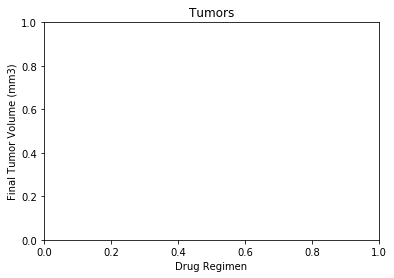

In [110]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#merge_df = pd.DataFrame(

#tumor_volume = filtered_df['Tumor Volume (mm3)']
#fig1, ax1 = plt.subplots()
#ax1.set_title('Tumor Volume of Mice')
#ax1.set_ylabel('Tumor Volume')
#ax1.boxplot(Tumor_Volume)
#plt.show()
    
    

#data_to_plot = [capo_df, rami_df, infu_df, ceft_df]
# i do not know what i am doing wrong
fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot([capo_df, rami_df, infu_df, ceft_df], labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

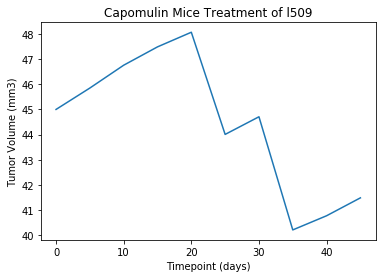

In [130]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#first isolate a mouse ID treated with Capomulin
capo_line = capo_df.loc[capo_df["Mouse ID"] == "l509",:]
timepoint_capo = capo_line["Timepoint"]
volume_capo = capo_line["Tumor Volume (mm3)"]
tumor_line = plt.plot(timepoint_capo, volume_capo)

# Chart visualization
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Mice Treatment of l509')
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

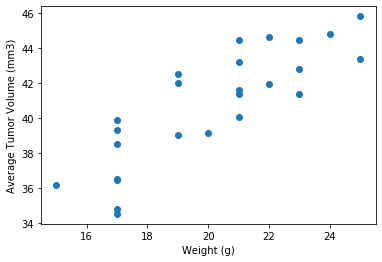

In [133]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

average_tumor_vol = capo_df.groupby(['Mouse ID']).mean()
plt.scatter(average_tumor_vol['Weight (g)'],average_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

In [141]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


NameError: name 'linregress' is not defined